<a href="https://colab.research.google.com/github/wilferalexander/Fuga_Empleados/blob/main/Fuga_Empleados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fuga Empleados**

#**Objetivos del proyecto**

Como te ha explicado el director de data science el gran objetivo del proyecto en el que vas a trabajar es reducir la fuga de empleados de la empresa.

Para ello durante esta semana vas a trabajar en 3 grandes cosas:

1. Entender y cuantificar el problema desde el punto de vista de negocio
2. Desarrollar un sistema automatizado de machine learning que identifique a los empleados que están en mayor riesgo de fuga
3. Comunicar los resultados de forma exitosa a la dirección

## DIA 1: ARRANQUE DEL PROYECTO

**Tareas para hoy**

Hoy nos vamos a centrar solo en 2 tareas, pero de gran importancia.

1. Entender el tipo de solución de data science que vamos a construir
2. Configurar el entorno de trabajo en el que vamos a realizar el proyecto

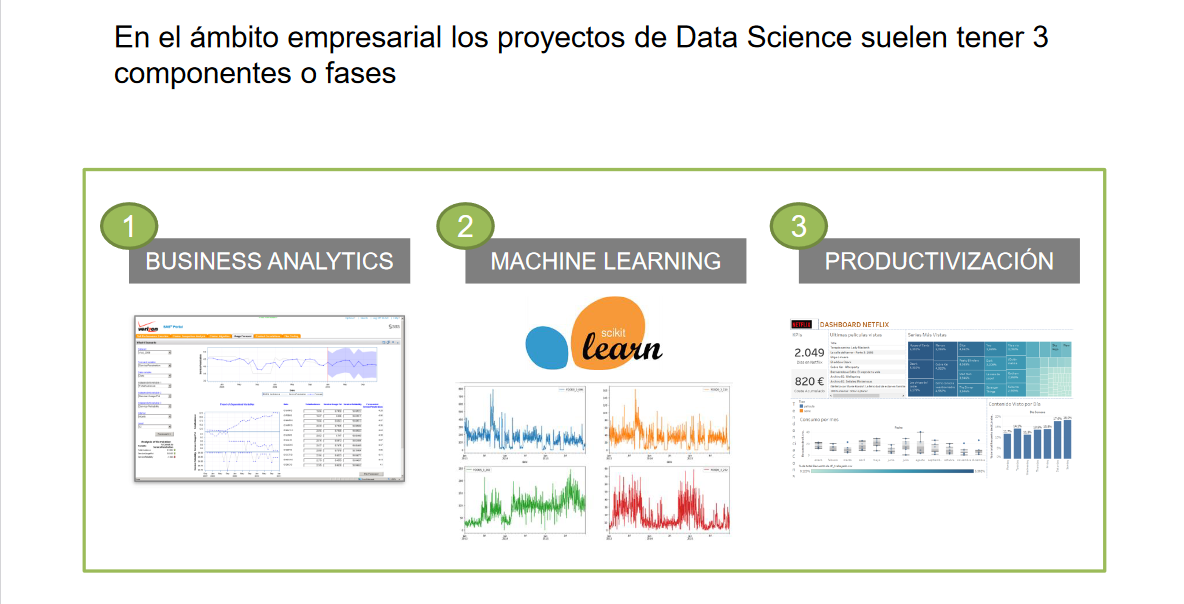

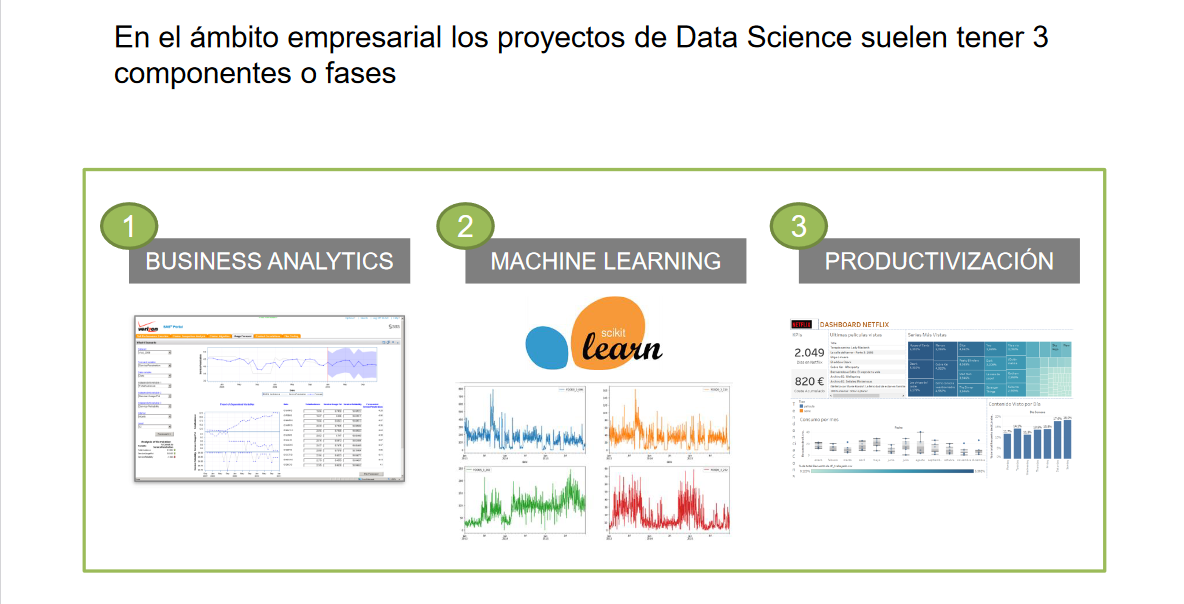


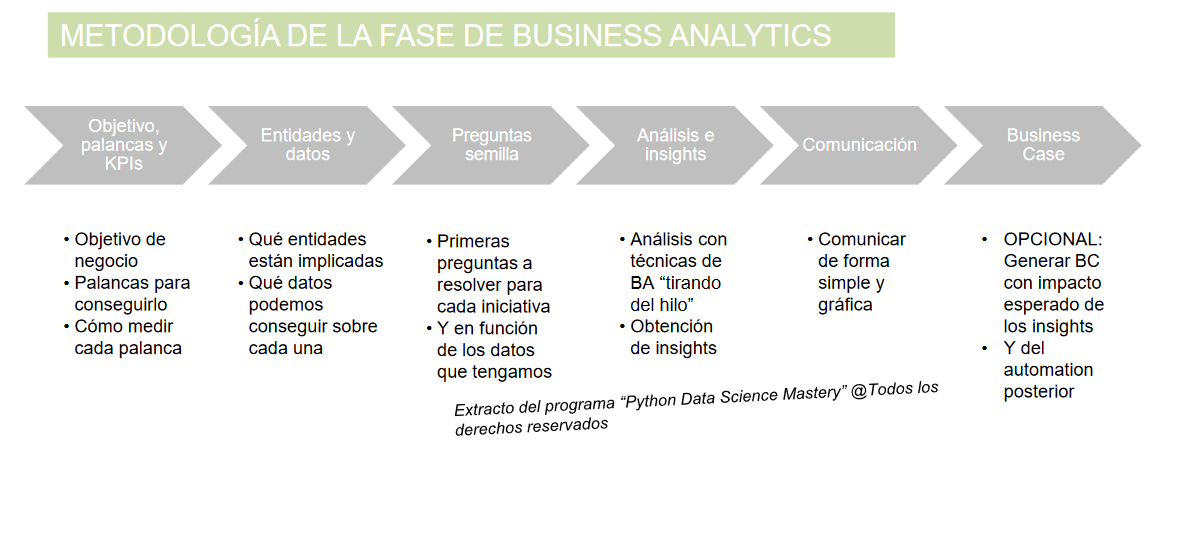

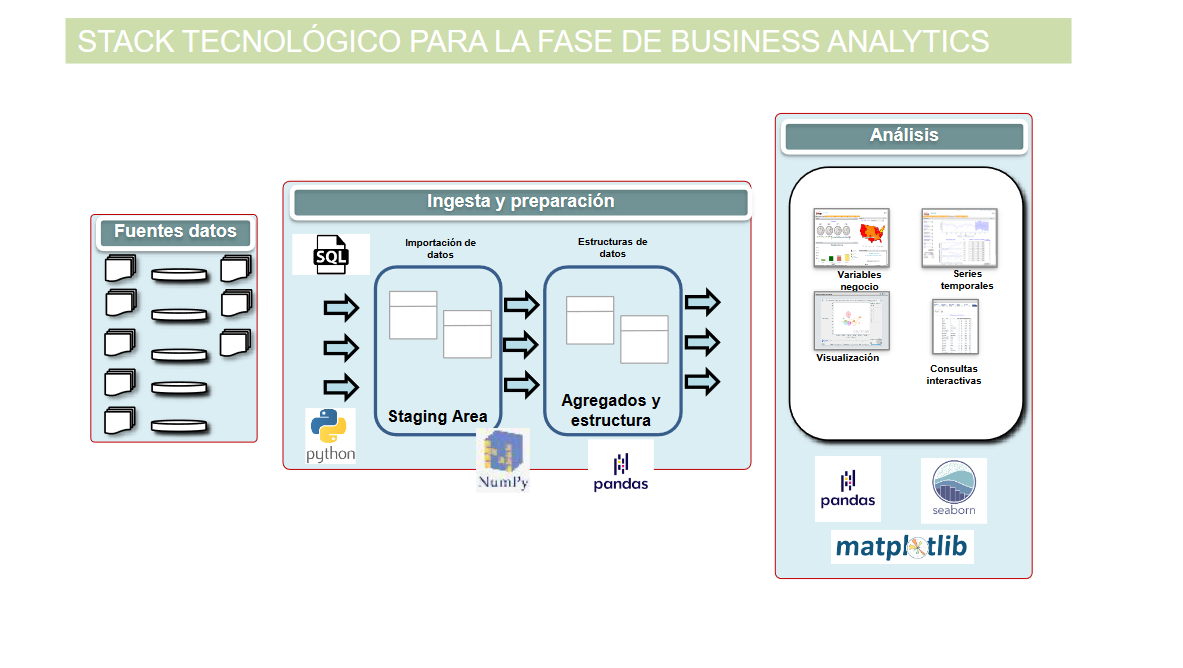

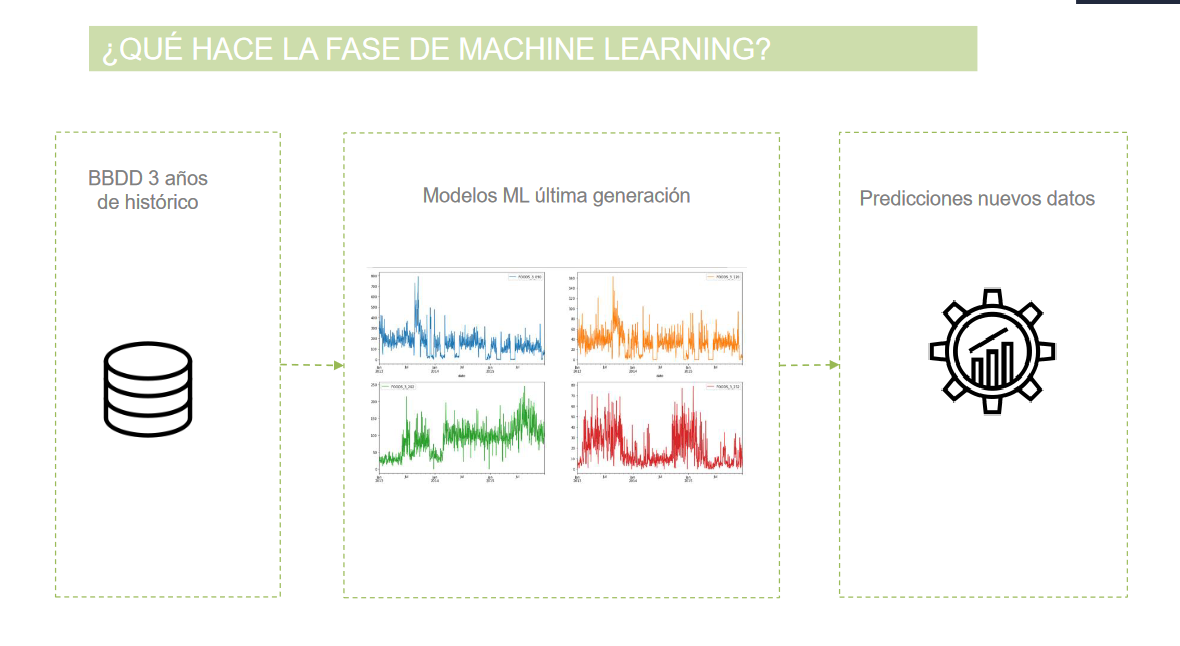

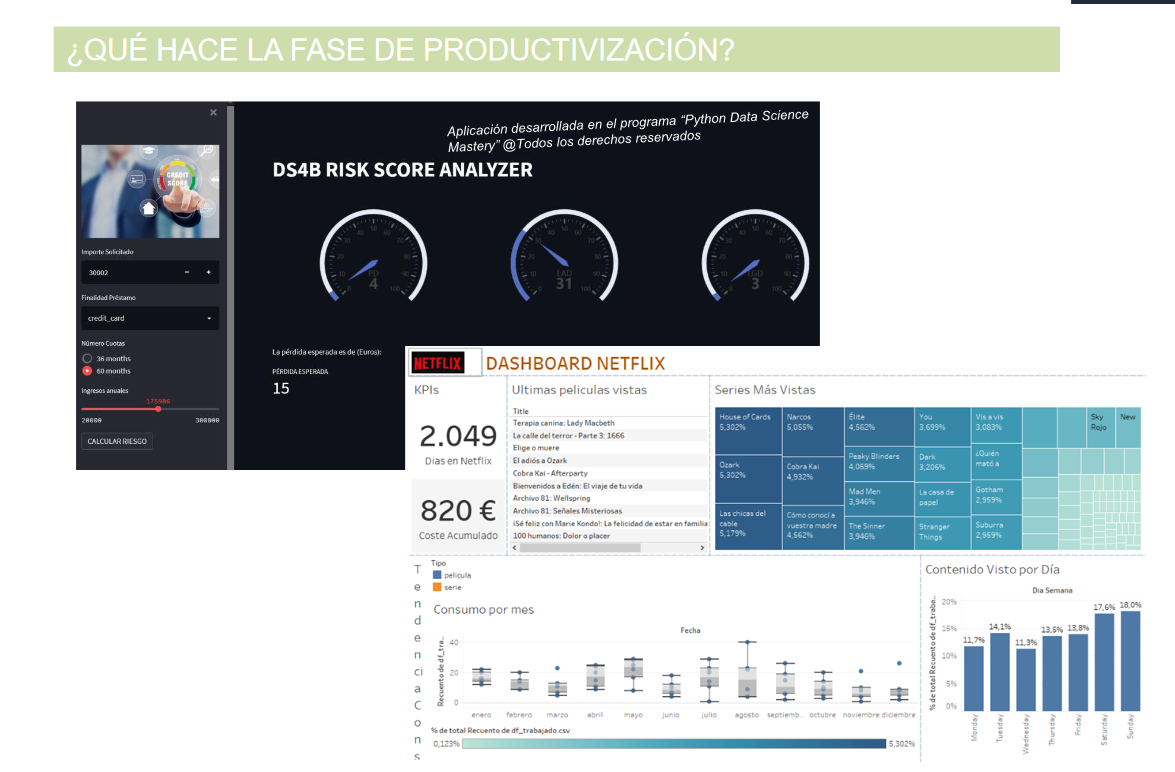

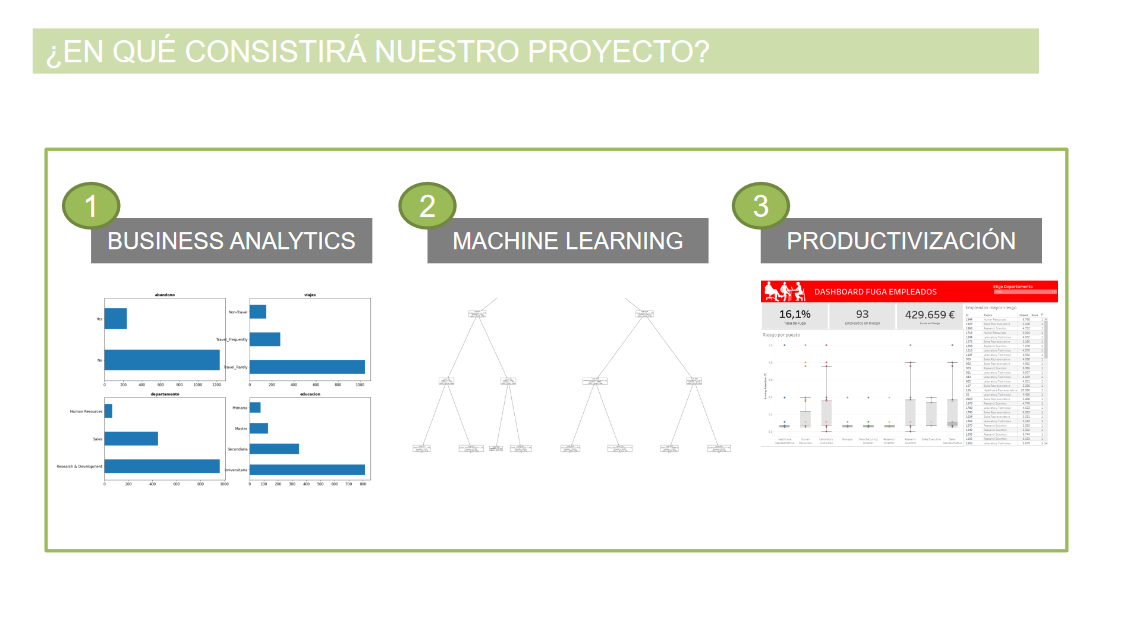


## DIA 1: CONFIGURACIÓN DEL ENTORNO

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### CARGA DE LIBRERIAS


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

### CARGA DE LOS DATOS



Antes de continuar deberás:

  


1.   Haber descargado los datos de la plataforma
2.   Haberlos descomprimido en alguna carpeta de tu disco duro
3. Haberlos subido a Colab mediante el explorador de archivos (icono de carpeta - icono de subir archivo)






  



In [72]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col='id', na_values=('#N/D'))

In [73]:
df.sample(5)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1621,35,No,Travel_Rarely,Research & Development,18,Master,Life Sciences,1,Media,4.0,...,Muy_Alta,80,0,16,2,Muy_Alta,16,NaN,1,10
1405,27,Yes,Travel_Rarely,Research & Development,17,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Muy_Alta,80,0,8,2,NaN,8,NaN,7,7
1740,40,No,Travel_Rarely,Sales,7,Universitaria,Medical,1,Media,3.0,...,Media,80,0,21,3,NaN,21,3.0,12,8
253,40,No,Travel_Rarely,Research & Development,4,Universitaria,Medical,1,Muy_Alta,3.0,...,Media,80,1,21,2,NaN,20,3.0,9,9
826,35,No,Travel_Rarely,Research & Development,1,Master,Life Sciences,1,Muy_Alta,4.0,...,Alta,80,0,7,0,NaN,2,NaN,2,2


## DIA 2: BUSINESS ANALYTICS

Identificamos cuantas filas  y columnas tengo en el dataset

In [74]:
#Información de los datos del dataset
print('Número de filas: ', df.shape[0])
print('Número de columnas: ', df.shape[1])
print('Datos Duplicados: ', df.duplicated().sum())
print('Variables Categóricas:: ', df.select_dtypes(include='object').shape[1])
print('Variables Numéricas: ', df.select_dtypes(exclude='object').shape[1])

Número de filas:  1470
Número de columnas:  31
Datos Duplicados:  0
Variables Categóricas::  15
Variables Numéricas:  16


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

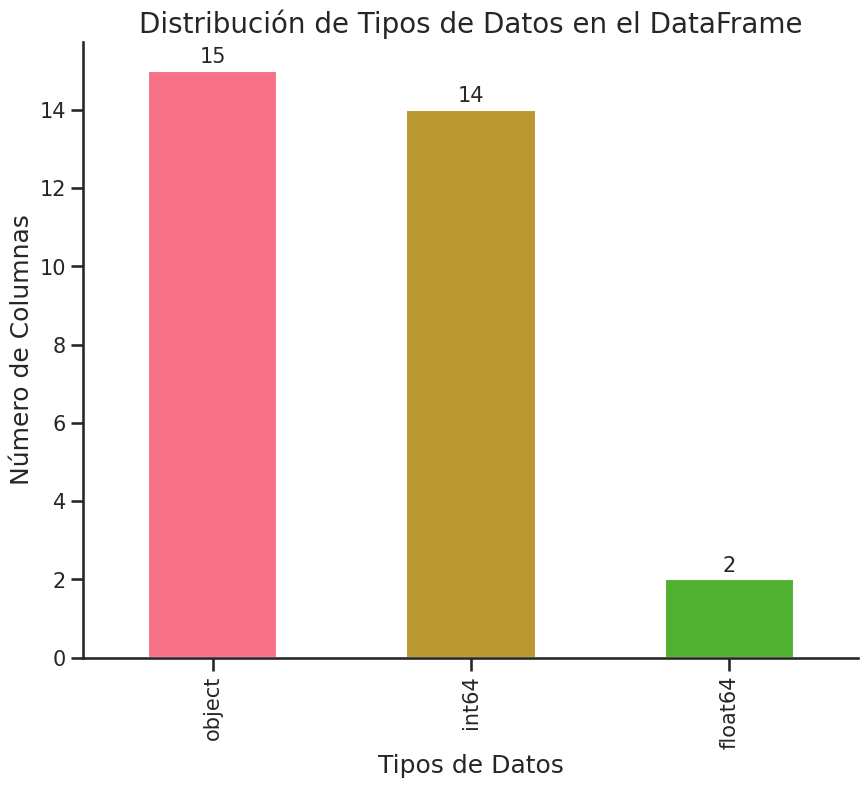

In [76]:
# Establecemos el estilo de Seaborn
sns.set(style ='ticks', context='talk', font_scale=1, palette='husl')
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# contamos los tipos de datos y crea un gráfico de barras
ax = df.dtypes.value_counts().plot(kind='bar',color=sns.color_palette('husl'), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2.,height +0.2, height, ha = 'center', size= 15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el gráfico
plt.show()

#### ANÁLISIS DE NULOS

In [77]:
#datos nulos
df.isnull().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Text(0, 0.5, 'Filas')

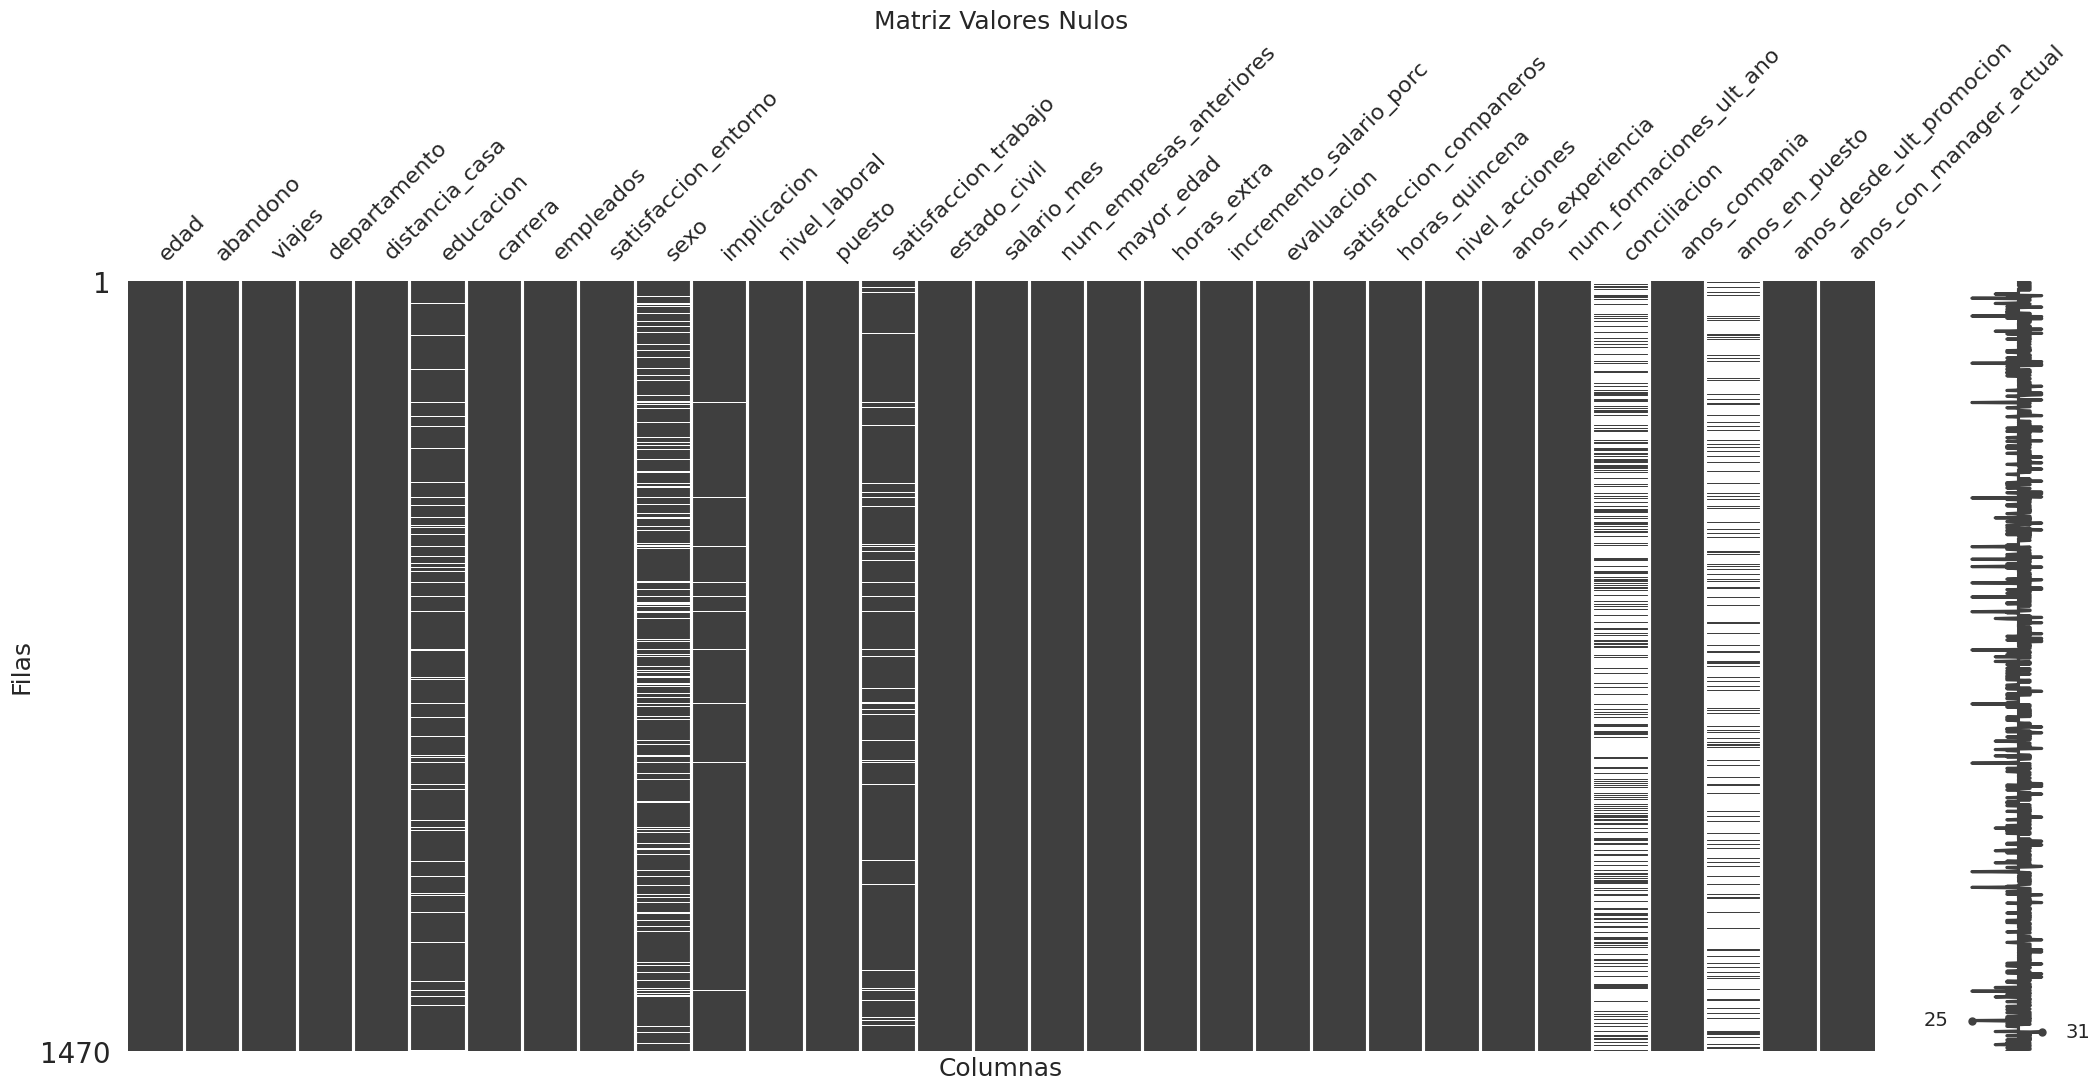

In [78]:
# Visualización con seaborn de los valores nulos
msno.matrix(df)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Conclusiones:

* anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables
* sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA


In [79]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df.sample(5)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
2023,23,Yes,Travel_Frequently,Sales,9,Universitaria,Marketing,1,Muy_Alta,3.0,...,19,Alta,Baja,80,1,1,3,1,1,0
1870,27,No,Travel_Frequently,Research & Development,15,Secundaria,Life Sciences,1,Muy_Alta,2.0,...,19,Alta,Muy_Alta,80,1,8,2,7,7,3
626,37,No,Non-Travel,Sales,9,Universitaria,Medical,1,Baja,3.0,...,13,Alta,Muy_Alta,80,1,9,6,9,7,7
1334,42,No,Non-Travel,Research & Development,2,Universitaria,Life Sciences,1,Alta,3.0,...,13,Alta,Muy_Alta,80,0,21,3,20,2,10
198,30,No,Travel_Rarely,Research & Development,2,Secundaria,Medical,1,Media,NaN,...,13,Alta,Muy_Alta,80,0,6,3,5,1,2


In [80]:
#Información de los datos del dataset
print('Número de filas: ', df.shape[0])
print('Número de columnas: ', df.shape[1])
print('Datos Duplicados: ', df.duplicated().sum())
print('Variables Categóricas:: ', df.select_dtypes(include='object').shape[1])
print('Variables Numéricas: ', df.select_dtypes(exclude='object').shape[1])

Número de filas:  1470
Número de columnas:  29
Datos Duplicados:  0
Variables Categóricas::  14
Variables Numéricas:  15


Text(0, 0.5, 'Filas')

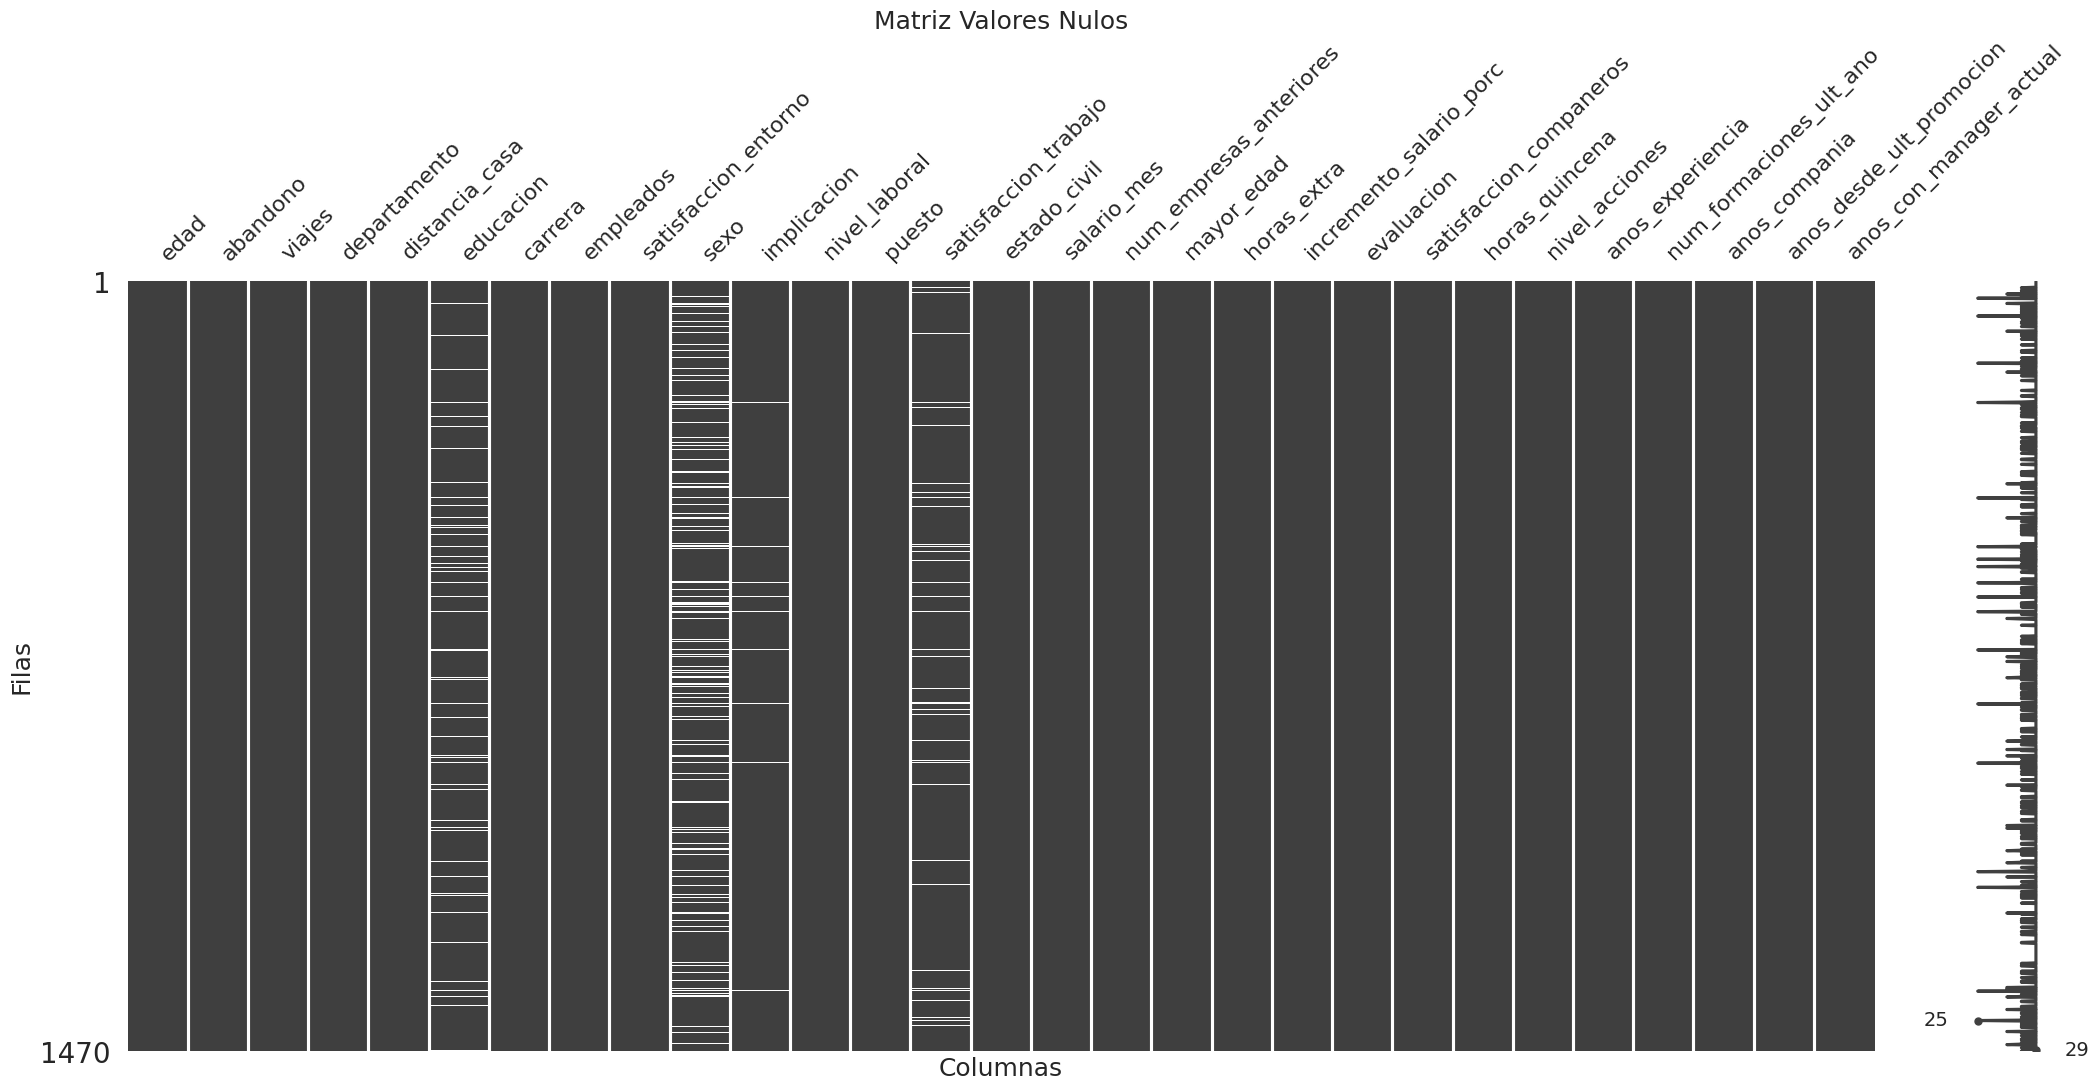

In [81]:
# Visualización con seaborn de los valores nulos
msno.matrix(df)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

#### EDA VARIABLES CATEGÓRICAS

In [82]:
def graficos_eda_categoricos(cat):

  #calculamos el número de filas que necesitamos
  from math import ceil
  filas =ceil(cat.shape[1]/2)

  #definimos el grafico
  f, ax = plt.subplots(nrows= filas, ncols=  2, figsize = (16, filas * 6))

  #aplanamos para iterar por el grafico como si fuera 1 dimension en lugar de 2
  ax = ax.flat

  #creamos el bucle que crea los grafico

  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.barh(ax= ax[cada])
    ax[cada].set_title(variable,fontsize= 12, fontweight = 'bold')
    ax[cada].tick_params(labelsize = 12)



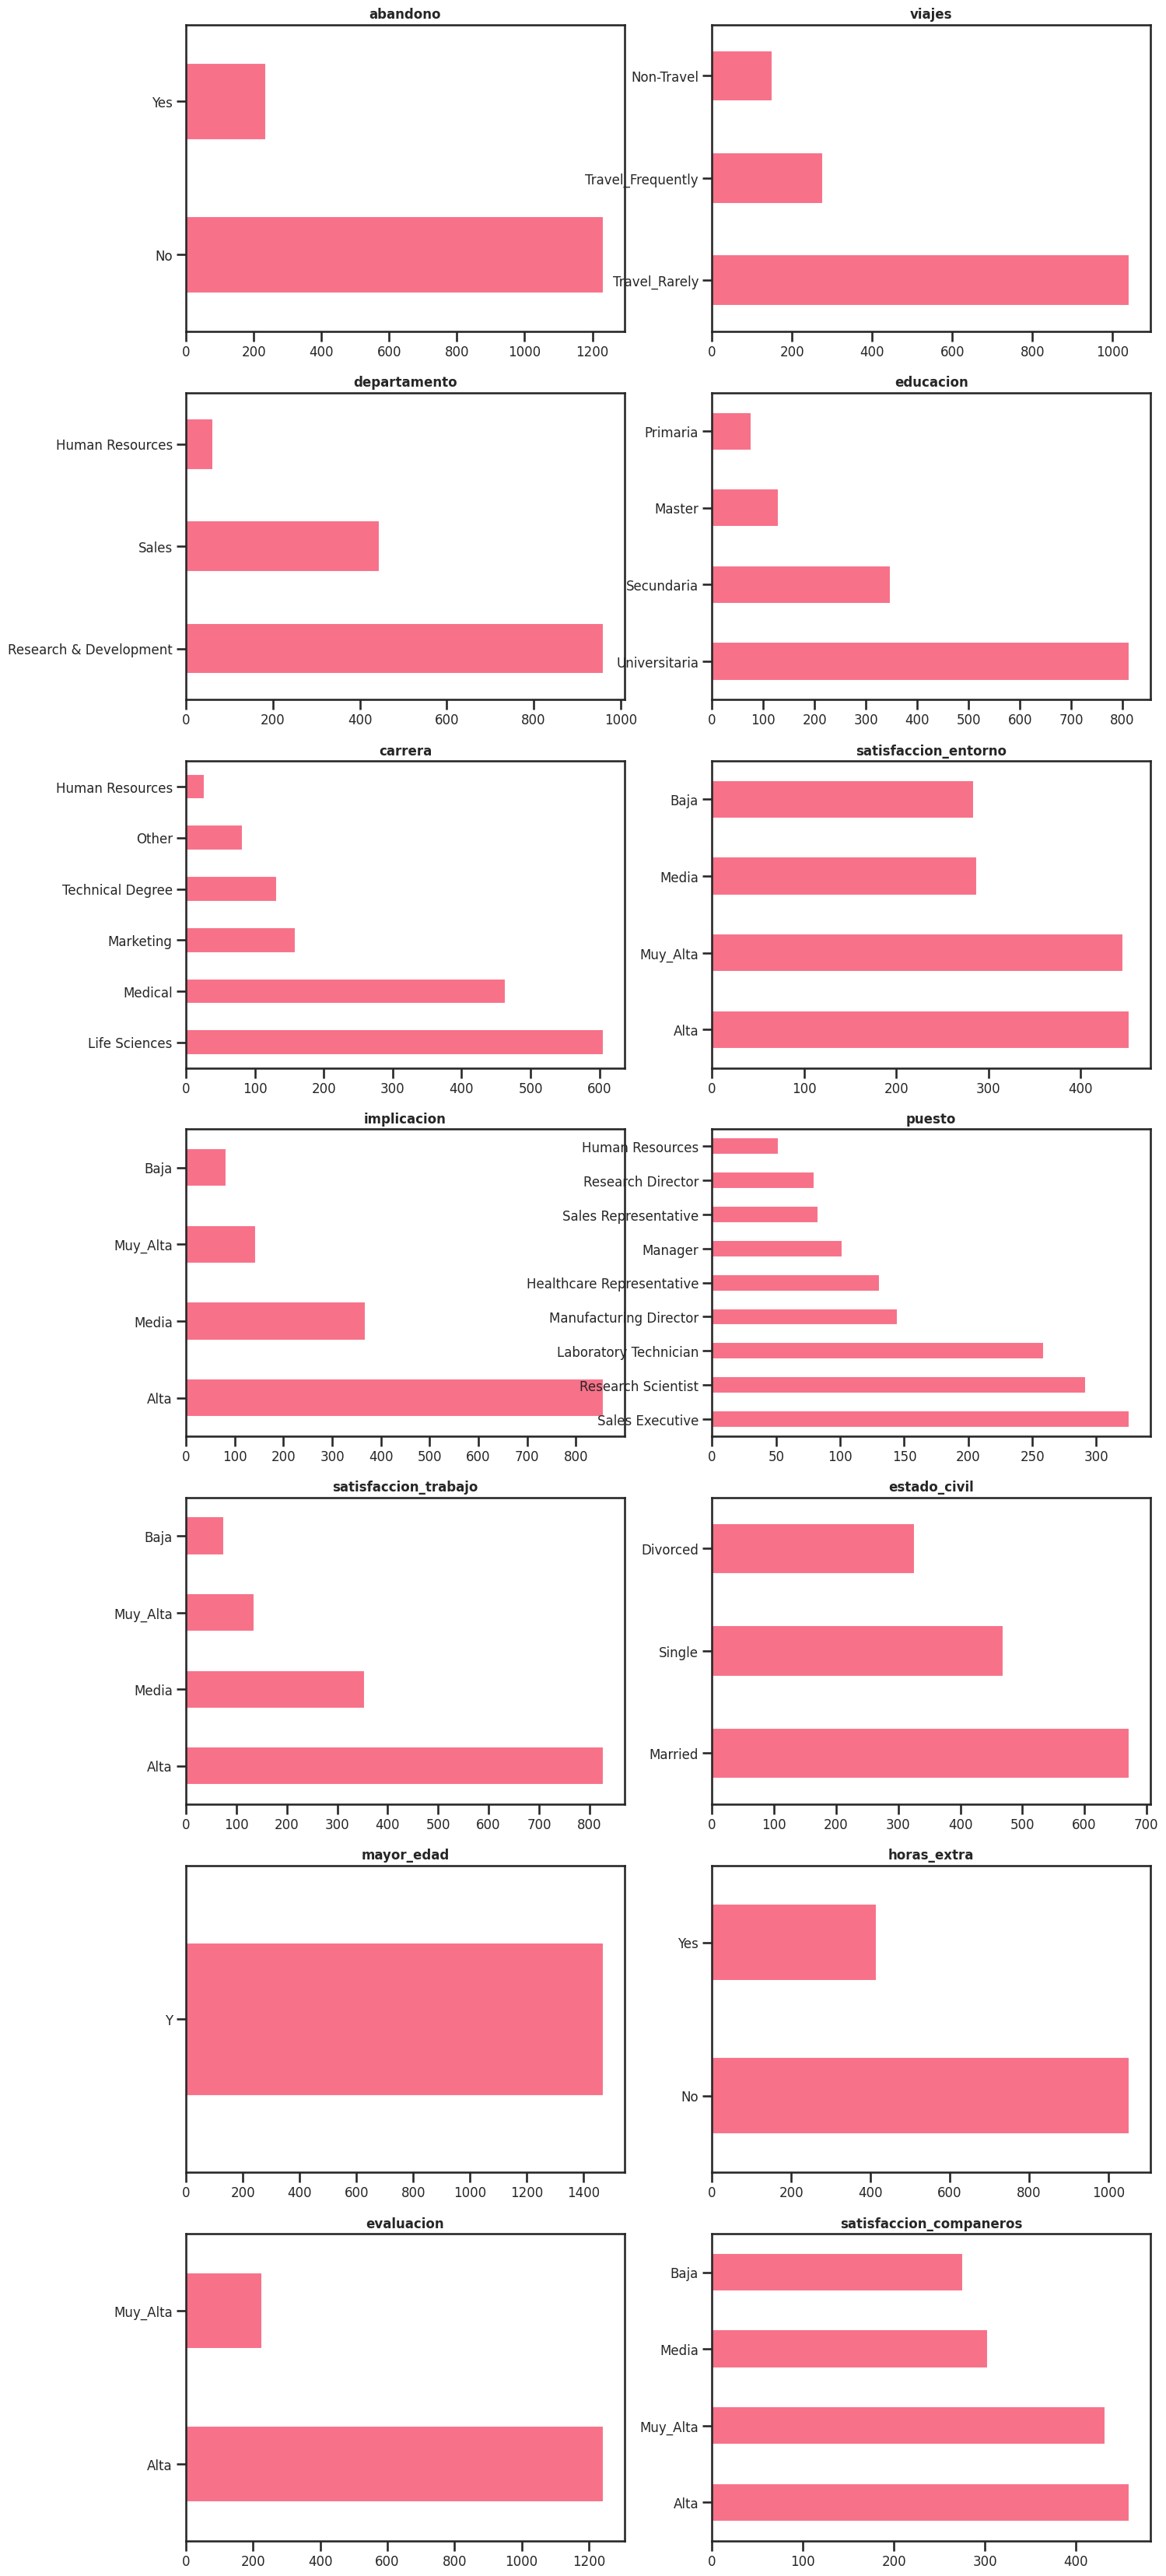

In [83]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:

* mayor_edad solo tiene un valor --> eliminarla
* Sobre las imputaciones pendientes de variables categóricas:
  * educacion: imputar por 'Universitaria'
  * satisfaccion_trabajo: imputar por 'Alta'
  * implicacion: imputar por 'Alta'

In [84]:
df.drop(columns ='mayor_edad', inplace = True)
df['educacion']= df['educacion'].fillna('Universitaria')
df['satisfaccion_trabajo']= df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')

#### EDA VARIABLES NUMÉRICAS

In [87]:
def estadisticos_cont(num):
  #calcular describe
  estadisticos = num.describe().T
  #Añadimos la mediana
  estadisticos['median']= num.median()
  #recordamos para la mediana este al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #devolvemos
  return(estadisticos)

In [90]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


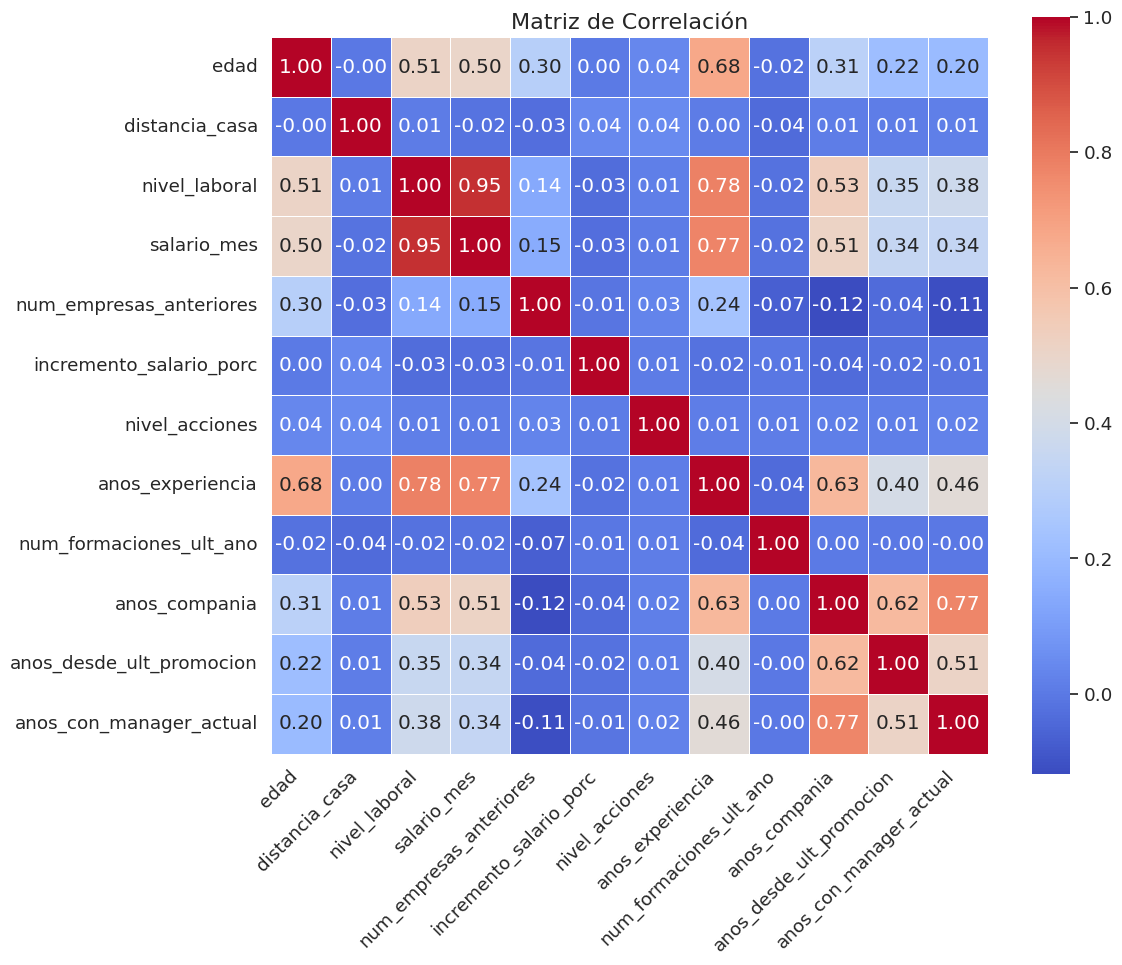

In [96]:
# Filtrar las columnas numéricas
df_numeric = df.select_dtypes('number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada


In [93]:
df.drop(columns= ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


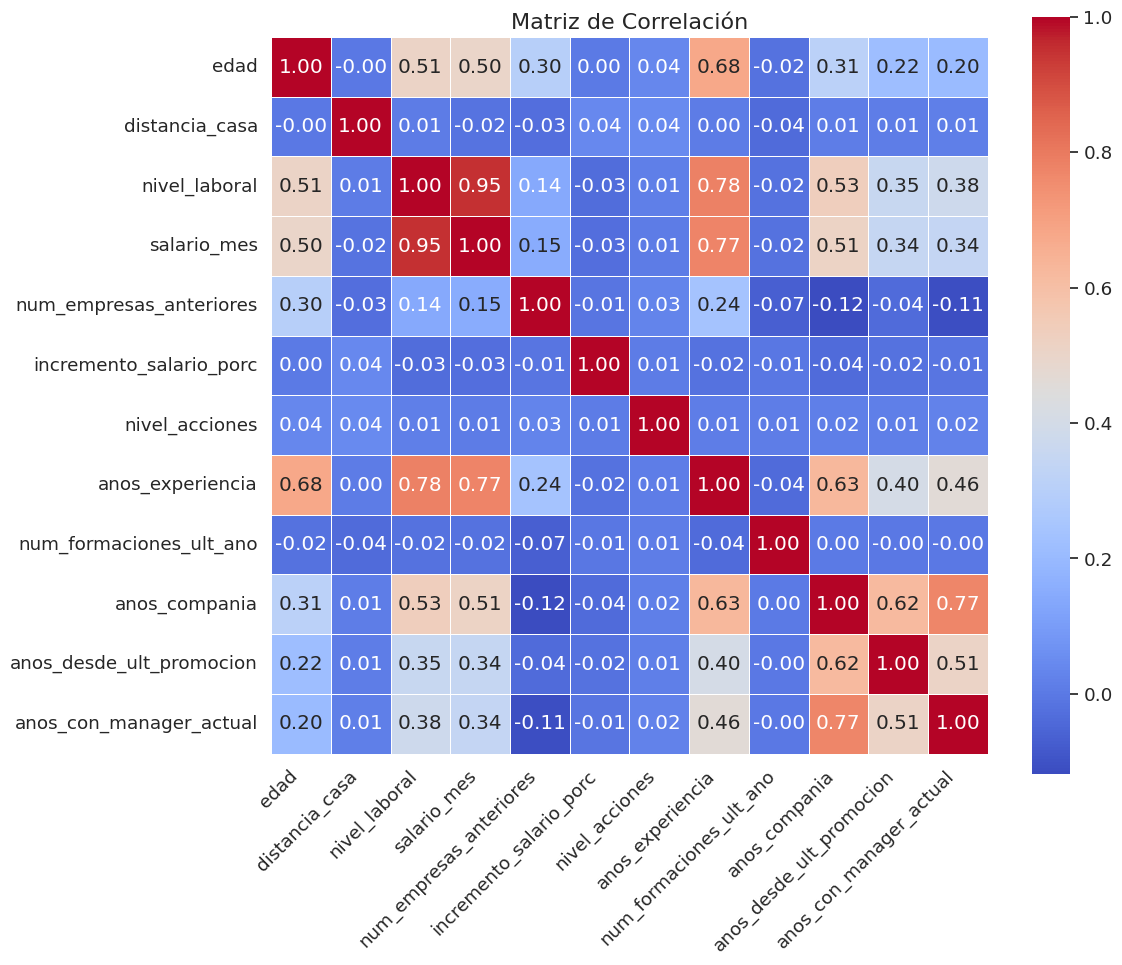

In [95]:
# Filtrar las columnas numéricas
df_numeric = df.select_dtypes('number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [97]:
df.abandono.value_counts(normalize = True)* 100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

### ¿Hay un perfil tipo de empleado que deja la empresa?

In [98]:
1. #transformar abandono a numeros
df['abandono'] = df.abandono.map({'No': 0,'Yes':1})

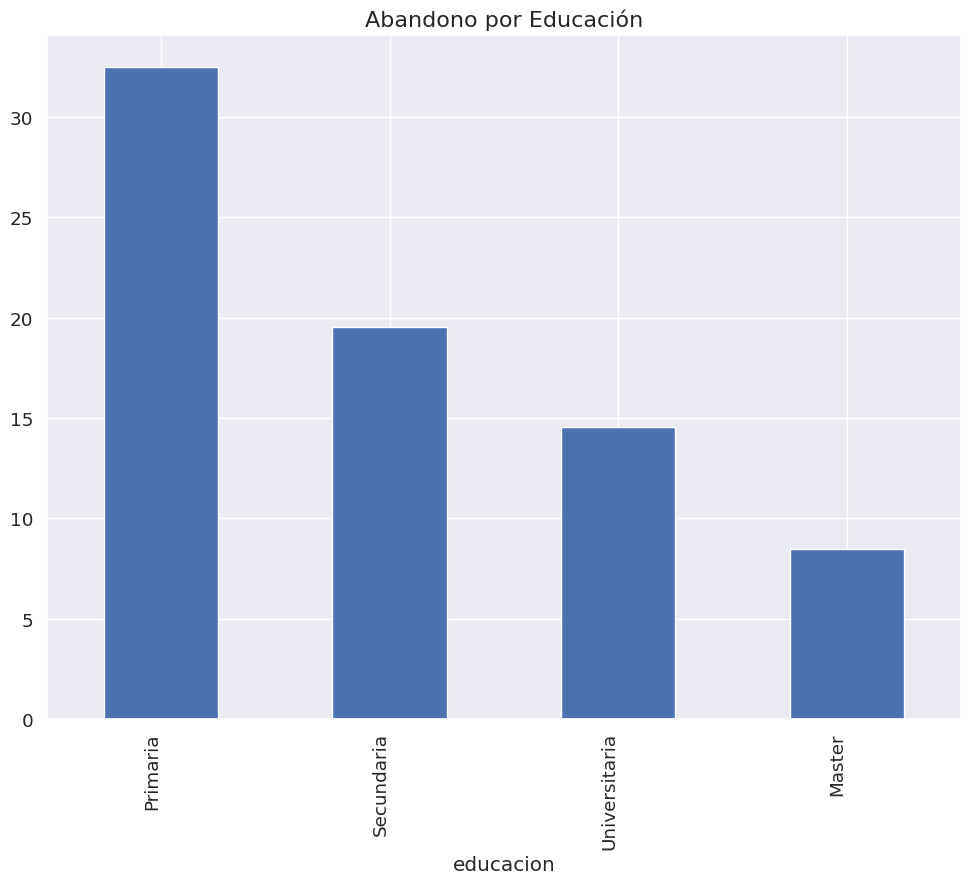

In [106]:
#analis por educacion
temp = df.groupby('educacion').abandono.mean().sort_values(ascending= False)* 100

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
plt.title('Abandono por Educación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Crear el gráfico de barras
temp.plot.bar()

# Mostrar el gráfico
plt.show()





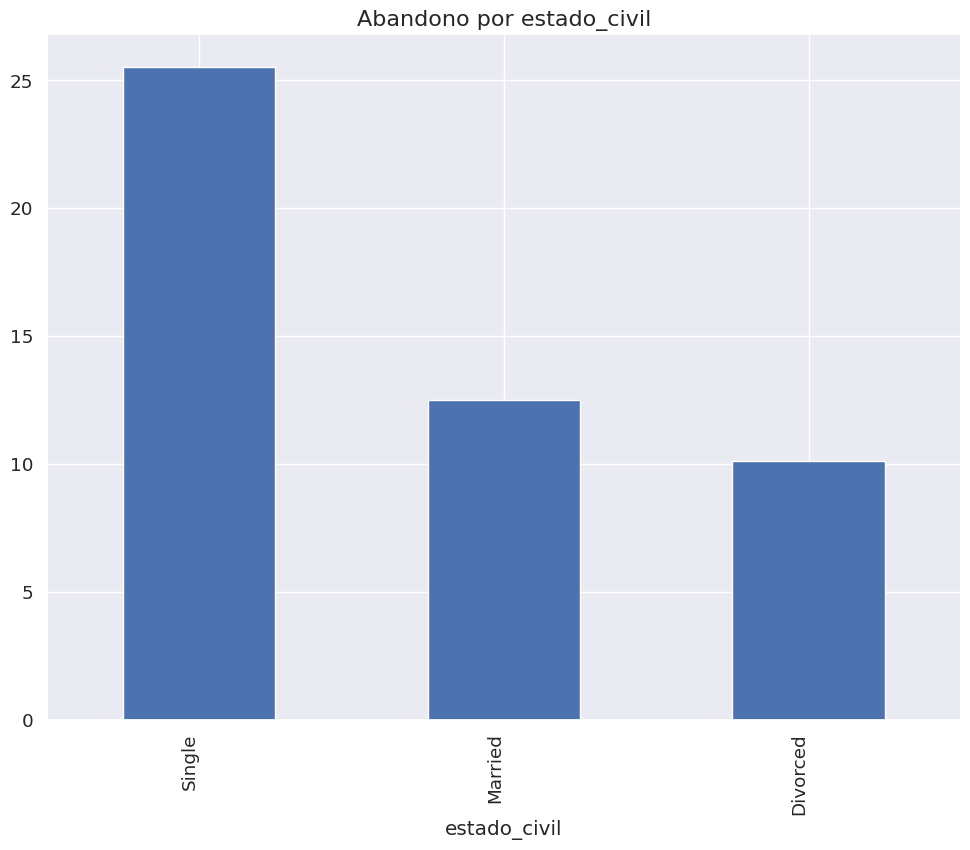

In [108]:
# Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
plt.title('Abandono por estado_civil', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Crear el gráfico de barras
temp.plot.bar()

# Mostrar el gráfico
plt.show()

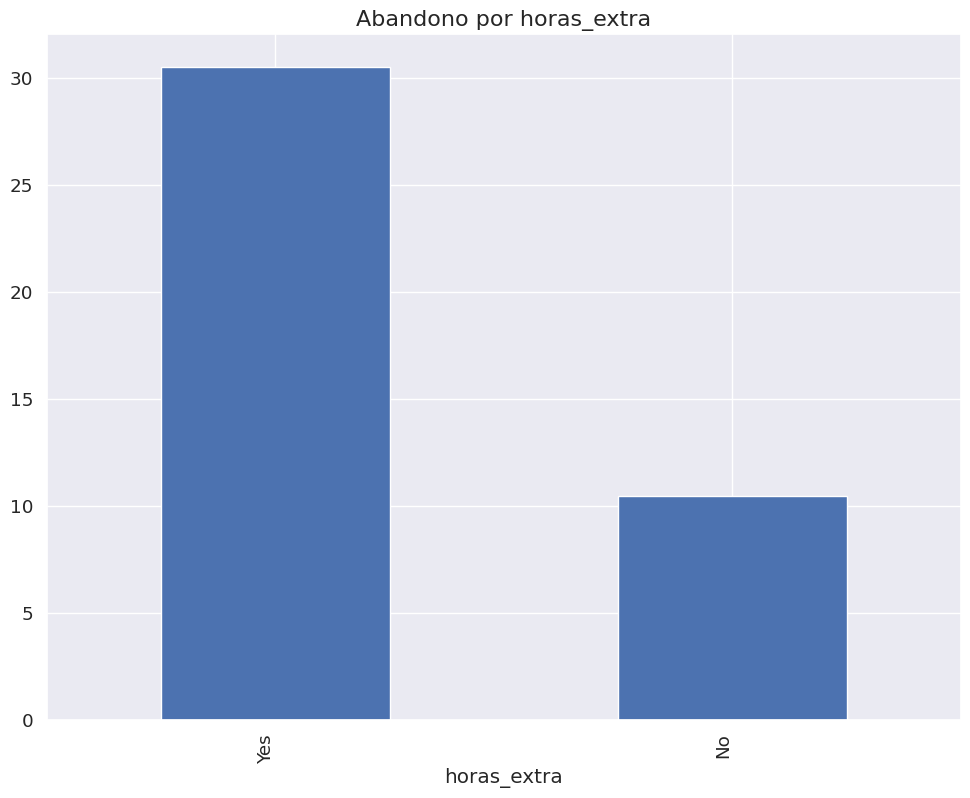

In [109]:
# Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
plt.title('Abandono por horas_extra', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Crear el gráfico de barras
temp.plot.bar()

# Mostrar el gráfico
plt.show()

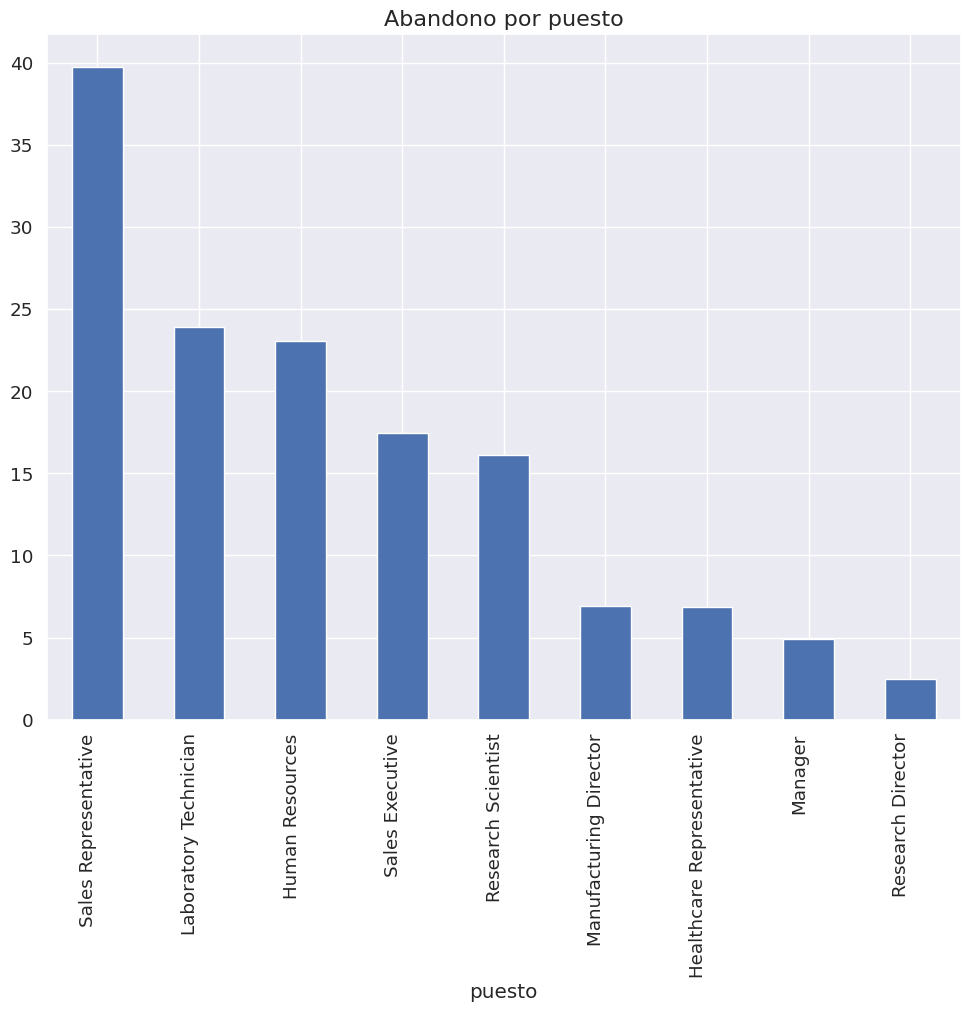

In [110]:
# Analisis por horas extras
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
plt.title('Abandono por puesto', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Crear el gráfico de barras
temp.plot.bar()

# Mostrar el gráfico
plt.show()

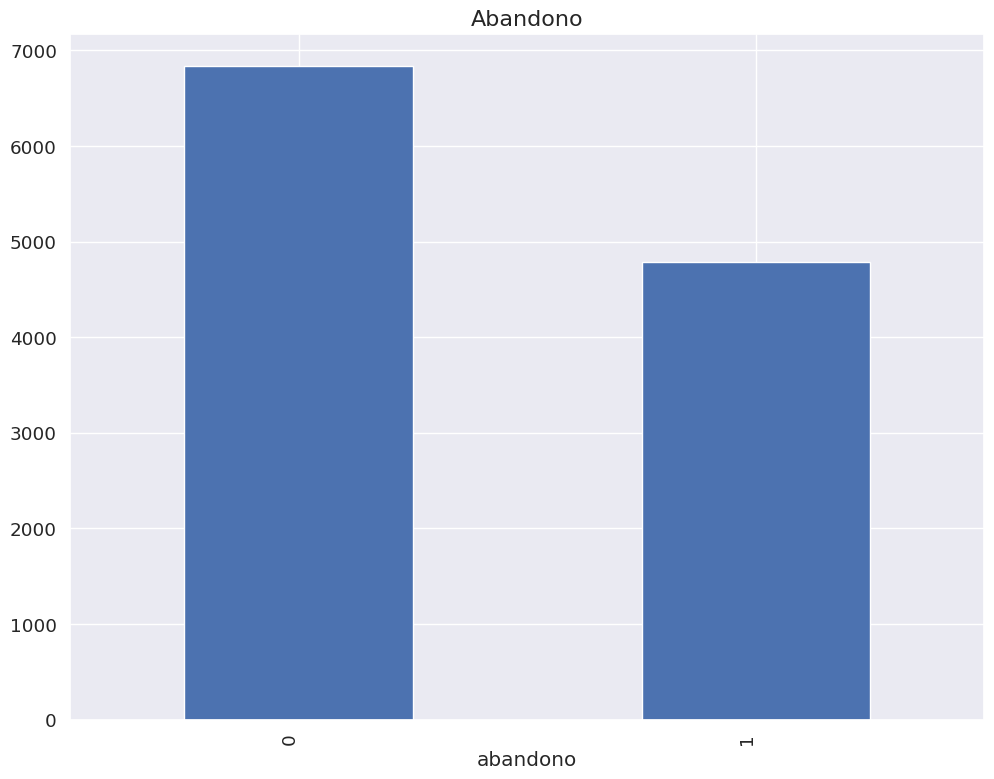

In [113]:
# Analisis por horas extras
temp = df.groupby('abandono').salario_mes.mean()
# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
plt.title('Abandono', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Crear el gráfico de barras
temp.plot.bar()

# Mostrar el gráfico
plt.show()

Conclusiones:

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

### ¿Cual es el impacto económico de este problema?

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [114]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [115]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


### ¿Cúanto nos ha costado este problema en el último año?

In [116]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

---
<br/><br/>

¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [117]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [118]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")
print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")
print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


### Y podemos seguir trazando estrategias asociadas a los insights de abandono:

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [119]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

Ahora vamos a estimar cuántos se nos irán este año

In [120]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [121]:
retenemos = int(se_iran * 0.3)
ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3
print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada